# Monday, April 14th

## A little more about dictionaries

We've seen some example of where dictionaries are a useful structure. Let's talk a little more about defining dictionaries:

One way is to create an empty dictionary (using `{}`) and add elements to that dictionary.

In [1]:
my_dict = {}

my_dict['a'] = 'Hello'0
my_dict[1] = 'I go with 1.'
my_dict['Hello'] = 'Goodbye'

In [2]:
my_dict

{'a': 'Hello', 1: 'I go with 1.', 'Hello': 'Goodbye'}

We can also define a dictionary with a comma separated list of `<key>:<value>` pairs:

In [3]:
my_dict = {'a':'Hello', 1:'I go with 1.', 'Hello':'Goodbye'}

In [4]:
my_dict

{'a': 'Hello', 1: 'I go with 1.', 'Hello': 'Goodbye'}

We can also use syntax similar to list comprehension to define dictionaries:

In [5]:
my_dict = {letter:number for number, letter in enumerate('abcde')}

In [6]:
my_dict

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

Once we have a dictionary, there are times when we may want to access just the keys, just the values, or the key/value pairs.

 - We can use the `.keys()` method to get a "list" of the keys. 
 - We can use the `.values()` method to get a "list" of the values.
 - We can use the `.items()` method to get a "list" of key/value pairs.

In [10]:
for key in my_dict.keys():
    print(key)

a
b
c
d
e


In [15]:
for value in my_dict.values():
    print(value)

0
1
2
3
4


In [16]:
for item in my_dict.items():
    print(item)

('a', 0)
('b', 1)
('c', 2)
('d', 3)
('e', 4)


In [17]:
for key, value in my_dict.items():
    print(key, value)

a 0
b 1
c 2
d 3
e 4


## More about function arguments and dictionaries

Recall: We can define functions to take in a specified number of positional arguments and some optional default arguments.

In [18]:
def f(a,b,c,d=7,e=8):
    return a+b+c+d+e

In [19]:
f(1,2,3)

21

In [20]:
f(1,2,3,4)

18

In [21]:
f(1,2,3,e=4)

17

Sometimes, it's helpful to be able to write functions where we don't know how many inputs it will accept, and/or we don't know what kinds of keyword arguments will be supplied.

For example, the `max` function can take in a comma separated list of values and will return the largest.

In [22]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [24]:
max(1,2,3,4,5,6,7,8,9,10,11,12)

12

To do this, we can use an `*` when defining a function to collect any unaccounted-for positional arguments:

In [25]:
def f(a,b,*args):
    print(a,b)
    print(args)

In [26]:
f(1,2)

1 2
()


In [27]:
f(1,2,3,4,5)

1 2
(3, 4, 5)


In [28]:
def my_sum(*args):
    return sum(args)

In [30]:
my_sum(1,2,3,4)

10

In [31]:
def product(*args):
    prod = 1
    for arg in args:
        prod *= arg
    return prod

In [33]:
product(1,2,3,6,7)

252

We can also use an `*` to unpack a list as positional arguments for a function:

In [41]:
product(*[1,2,3,4])

24

## Dictionaries and keyword arguments

Suppose we have a function that takes in some input variables `a`, `b`, `c`, `d`. Suppose we also have a dictionary with keys `'a'`, `'b'`, `'c'`, and `'d'`.

In [34]:
def f(a,b,c,d):
    return a + b + c + d

In [35]:
my_dict = {'a':'Hello', 'b': ' ', 'c':'Goodbye', 'd':'!'}

We can use the dictionary to define keyword arguments to plug into our function using `**`:

In [36]:
f(**my_dict)

'Hello Goodbye!'

In [37]:
import matplotlib.pyplot as plt

In [39]:
#help(plt.plot)

Let's see an example in practice. Suppose that I want to plot several curves, each with the same linestyle and markerstyle.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

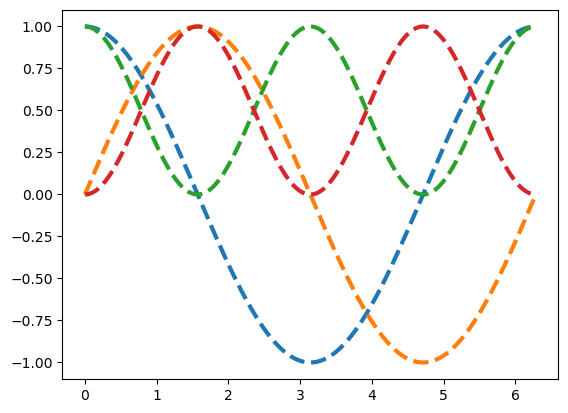

In [57]:
t = np.linspace(0,2*np.pi,1000)

y1 = np.cos(t)
y2 = np.sin(t)
y3 = np.cos(t)**2
y4 = np.sin(t)**2

my_dict = {'linestyle':'dashed', 'linewidth':3}

plt.plot(t,y1, **my_dict)
plt.plot(t,y2, **my_dict)
plt.plot(t,y3, **my_dict)
plt.plot(t,y4, **my_dict)

## Regular expressions

The regular expressions package, `re`, is a powerful tool for processing text data.

In [75]:
import re

We've seen how to use the `.replace` function to replace some text with new text:

In [79]:
s = "This string doesn't use contractions. The last sentence wasn't a lie."

In [80]:
s.replace("doesn't", 'does not')

"This string does not use contractions. The last sentence wasn't a lie."

In the above example, we explicitly replaced the string `doesn't` with `does not`.

Very often, we may want to make more flexible replacements. The `re` package gives us this flexibility. Some of the key functions that we will use are:
 - `re.findall`: this is used to find substrings that match a given pattern
 - `re.sub`: this used to replace substrings with desired text

In [83]:
help(re.findall)

Help on function findall in module re:

findall(pattern, string, flags=0)
    Return a list of all non-overlapping matches in the string.
    
    If one or more capturing groups are present in the pattern, return
    a list of groups; this will be a list of tuples if the pattern
    has more than one group.
    
    Empty matches are included in the result.



In [93]:
s = 'This is a test string. Lalalala. Happy Monday! Tis the season.'

In [94]:
re.findall('la', s)

['la', 'la', 'la']

The patterns that we use for regular expressions can be much more general than just explicit strings. For example,
 - `\w` can be used to represent any word character
 - `\d` can be used to represent any digit character
 - `\s` can be used to represent any white space character

In [95]:
re.findall('\w\ws\s', s)

['his ', 'Tis ']

Last time, I downloaded the text of Frankenstein. Let's read it in and explore it with regular expressions:

In [96]:
with open('frankenstein.txt',encoding='utf-8') as f:
    text = f.read()

Let's find all four letter words that end with `s`:

In [97]:
re.findall('\s\w\w\ws\s', text)

['\nThis ',
 ' this ',
 ' laws ',
 ' this ',
 ' this\n',
 ' This ',
 ' this ',
 ' this\n',
 ' this\n',
 ' This ',
 ' seas ',
 ' this\n',
 '\nThis ',
 ' this ',
 ' pass ',
 '\neyes ',
 ' this ',
 ' This\n',
 ' owes ',
 ' pass ',
 ' this ',
 ' This ',
 ' pass ',
 ' Thus ',
 ' pass ',
 '\nThis ',
 ' this ',
 ' this ',
 ' this ',
 ' this ',
 ' thus ',
 ' days ',
 ' this ',
 ' eyes ',
 ' does ',
 ' woes ',
 ' dogs ',
 '\nThis ',
 ' this ',
 ' this ',
 ' this ',
 ' this ',
 ' foes ',
 ' this ',
 ' this ',
 '\ndoes ',
 ' this ',
 ' this ',
 ' this ',
 ' this ',
 ' thus ',
 ' This ',
 ' This\n',
 ' eyes ',
 ' days ',
 ' This ',
 ' this ',
 ' this ',
 ' This ',
 ' this ',
 ' ages ',
 '\nthis ',
 ' this ',
 ' this ',
 ' this ',
 ' eyes ',
 ' lips ',
 ' eyes ',
 ' this ',
 ' laws ',
 ' this ',
 ' this ',
 ' this ',
 ' this ',
 ' this\n',
 ' thus ',
 ' this ',
 ' laws ',
 ' this ',
 ' this ',
 ' this ',
 '\nThus ',
 ' this ',
 ' thus ',
 ' laws ',
 ' this\n',
 ' this ',
 ' This ',
 ' ties ',
 ' le

Rather than using `\s` to signify a space before or after our words, we can also use `\b` to designate a "boundary character", which is a letter character that is adjacent to white space (or puncutation).

In [106]:
set(re.findall(r'\b\w\w\w\w\w\w\ws\b', text))

{'Albertus',
 'Asiatics',
 'Darkness',
 'Generous',
 'Grecians',
 'Idleness',
 'Italians',
 'Lycurgus',
 'Phillips',
 'Pitiless',
 'Sections',
 '_Sorrows',
 'accounts',
 'agitates',
 'analysis',
 'arbiters',
 'arteries',
 'articles',
 'attempts',
 'attracts',
 'auguries',
 'barriers',
 'beauties',
 'believes',
 'benefits',
 'blankets',
 'brambles',
 'branches',
 'breakers',
 'brothers',
 'business',
 'cabinets',
 'calmness',
 'caprices',
 'careless',
 'caresses',
 'chemists',
 'chimeras',
 'coldness',
 'colleges',
 'composes',
 'comrades',
 'condemns',
 'confines',
 'confirms',
 'consoles',
 'consumes',
 'contents',
 'coolness',
 'cottages',
 'creators',
 'crevices',
 'darkness',
 'delights',
 'deprives',
 'descends',
 'desirous',
 'detracts',
 'dialects',
 'displays',
 'distress',
 'disturbs',
 'dungeons',
 'editions',
 'elements',
 'elevates',
 'emotions',
 'energies',
 'environs',
 'epithets',
 'expenses',
 'extremes',
 'eyeballs',
 'families',
 'fatigues',
 'fearless',
 'features',

Instead of manually typing in 8 different `\w` word characters, we can write `\w{8}` to denote 8 `\w` characters.

In [117]:
set(re.findall(r'\b\w{14}s\b', text))

{'accomplishments',
 'classifications',
 'considerateness',
 'disappointments',
 'impossibilities',
 'inquisitiveness',
 'representations'}

In [125]:
s = 'Today is 4/14/2025. Tomorrow is 4/15/2025. The time is 4:43PM. In eight hours, it will be 12:43AM.' 

In [119]:
re.findall('\d{,2}/\d{,2}/\d{4}', s)

['4/14/2025', '4/15/2025']

We can use square brackets to specify a collection of valid characters to match:

In [128]:
re.findall('\d{,2}:\d{2}[AP]M', s)

['4:43PM', '12:43AM']

Suppose we want to replace dates that are in the format `mm/dd/YYY` with a new format, `mm - dd - YYYY`.

In [132]:
help(re.sub)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.



In [136]:
def reformat_date(date):
    return date.group(0).replace('/', ' - ')

In [137]:
re.sub('\d{,2}/\d{,2}/\d{4}', reformat_date, s)

'Today is 4 - 14 - 2025. Tomorrow is 4 - 15 - 2025. The time is 4:43PM. In eight hours, it will be 12:43AM.'